In [2]:
import pandas as pd

df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')
df.corr()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
2010 revenue,1.000000,0.069654,-0.229845,0.434233,0.809460,0.488375
days_since_first_purchase,0.069654,1.000000,0.665498,0.317724,-0.109867,0.016252
days_since_last_purchase,-0.229845,0.665498,1.000000,-0.384981,-0.046768,-0.159274
number_of_purchases,0.434233,0.317724,-0.384981,1.000000,-0.066624,0.277712
avg_order_cost,0.809460,-0.109867,-0.046768,-0.066624,1.000000,0.360402
2011 revenue,0.488375,0.016252,-0.159274,0.277712,0.360402,1.000000


In [3]:
df.columns

Index(['2010 revenue', 'days_since_first_purchase', 'days_since_last_purchase',
       'number_of_purchases', 'avg_order_cost', '2011 revenue'],
      dtype='object')

In [4]:
X = df[['2010 revenue', 'days_since_last_purchase',
       'number_of_purchases', 'avg_order_cost']]
y = df[['2011 revenue']]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
X_train.columns

Index(['2010 revenue', 'days_since_last_purchase', 'number_of_purchases',
       'avg_order_cost'],
      dtype='object')

In [7]:
model.coef_

array([[  2.06840529, -36.2114965 , 874.79277327,   1.99784821]])

In [9]:
model.intercept_

array([549.47894119])

In [11]:
single_customer = pd.DataFrame({
    '2010 revenue' : [1000], 
    'days_since_last_purchase' : [20], 
    'number_of_purchases' : [2],
    'avg_order_cost' : [500]
})

In [12]:
model.predict(single_customer)

array([[4642.16394904]])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  


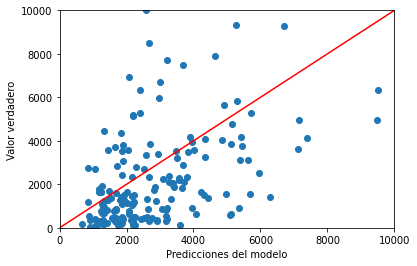

In [14]:
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0,10000],[0,10000],'k-', color = 'r')
plt.xlabel('Predicciones del modelo')
plt.ylabel('Valor verdadero')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff5e2091-543c-4b2c-9a56-1e41bbaff775' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>